# Past polluters, future saviours? A classification of countries

**Task:** Gather a dataset that includes countries and their past, present, and future emissions as well as other useful indicators. Classify the countries using hierarchical clustering to generate groups of countries regarding their emission behaviour. Compose a research brief that presents and discusses the data and your results against in the context of climate (in-)justice, global imbalances, and the strive for international climate agreements. The brief shall target academics, policymakers, and civil society alike.

**Source:** Data on CO2 and Greenhouse Gas Emissions by *Our World in Data*

https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions

https://github.com/jdmorales89/co2-data.git

### 0. Defining functions

In [40]:
# Line plot function
def line_plot(
    data: pd.DataFrame,
    var: str,
    xlabel: str = "",
    ylabel: str = "",
    title: str = "",
):
    fig, ax = plt.subplots(figsize=(10, 6))

    for country in sel_countries:
        df = data[data["country"] == country].interpolate(
            method="linear", limit_direction="forward"
        )
        ax.plot(df["year"], df[var], label=country)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    plt.show()

In [41]:
# Horizontal bar plot function
def barh_plot(
    data: pd.DataFrame,
    var: str,
    year=2020,
    xlabel: str = "",
    ylabel: str = "",
    title: str = "",
    ascending: bool = True,
):
    fig, ax = plt.subplots(figsize=(10, 6))

    country_list = list(
        data[data["year"] == year].sort_values(var, ascending=ascending)["country"]
    )

    for country in country_list:
        df0 = data[data["country"] == country].interpolate(
            method="linear", limit_direction="forward"
        )
        df = df0[df0["year"] == year]
        ax.barh(df["country"], df[var], label=country)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(f"{title} year {year}")
    plt.show()

### 1. Importing the dataset

In [42]:
# Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
# loading ansd inspecting the database
data_full = pd.read_csv("owid-co2-data.csv")
data_full.sample(5)

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
11238,IRN,Iran,1963,41.305,NaN,10.36,3.877,NaN,1.744,NaN,...,NaN,NaN,NaN,NaN,NaN,2.368025e+07,9.092196e+10,NaN,NaN,NaN
201,NaN,Africa,2013,1260.316,963.117,0.57,7.172,-297.2,1.123,0.858,...,NaN,NaN,NaN,NaN,NaN,1.123045e+09,NaN,4760.608,4239.018,NaN
24027,USA,United States,1980,4808.296,NaN,-3.99,-200.063,NaN,20.953,NaN,...,NaN,NaN,NaN,NaN,NaN,2.294764e+08,6.743208e+12,20717.494,90281.745,3.074
8236,FRO,Faeroe Islands,1950,0.040,NaN,NaN,NaN,NaN,1.279,NaN,...,NaN,NaN,NaN,NaN,NaN,3.150200e+04,NaN,NaN,NaN,NaN
23867,USA,United States,1820,0.791,NaN,3.85,0.029,NaN,0.079,NaN,...,NaN,NaN,NaN,NaN,NaN,9.966626e+06,2.668967e+10,NaN,NaN,NaN


### 2. Filtering the dataset

In [44]:
sel_countries = ["China", "Germany", "United Kingdom", "United States"]
data_filtered = data_full[data_full["country"].isin(sel_countries)]

### 3. Plotting

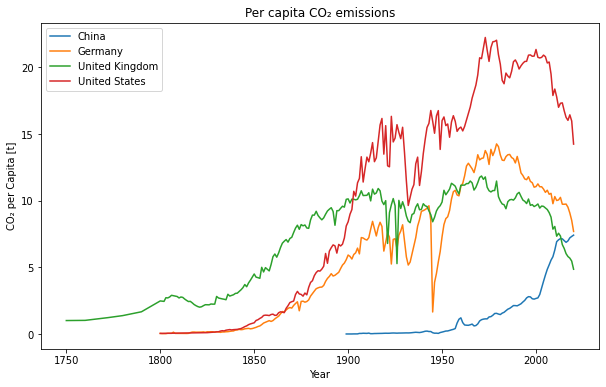

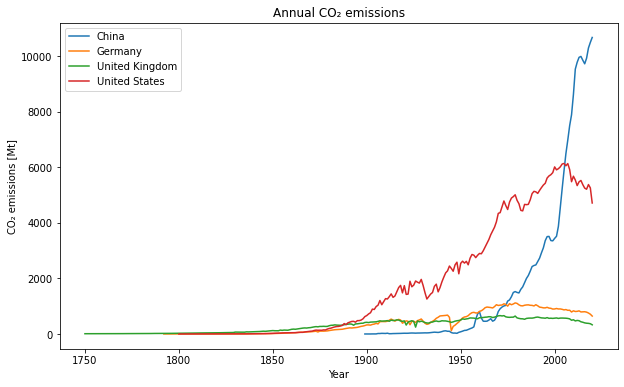

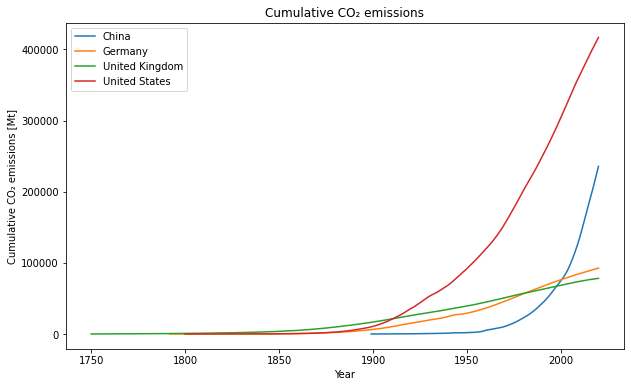

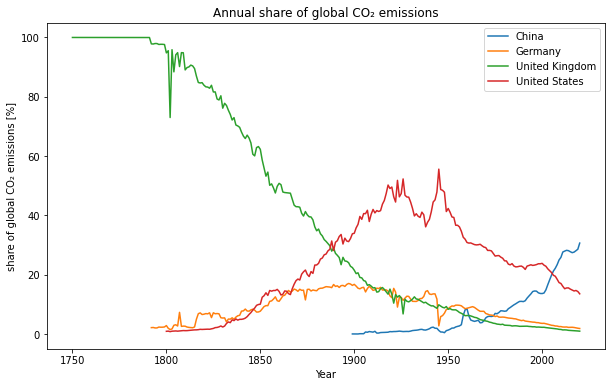

In [45]:
line_plot(
    data_filtered,
    "co2_per_capita",
    xlabel="Year",
    ylabel="CO₂ per Capita [t]",
    title="Per capita CO₂ emissions",
)
line_plot(
    data_filtered,
    "co2",
    xlabel="Year",
    ylabel="CO₂ emissions [Mt]",
    title="Annual CO₂ emissions",
)
line_plot(
    data_filtered,
    "cumulative_co2",
    xlabel="Year",
    ylabel="Cumulative CO₂ emissions [Mt]",
    title="Cumulative CO₂ emissions",
)
line_plot(
    data_filtered,
    "share_global_co2",
    xlabel="Year",
    ylabel="share of global CO₂ emissions [%]",
    title="Annual share of global CO₂ emissions",
)

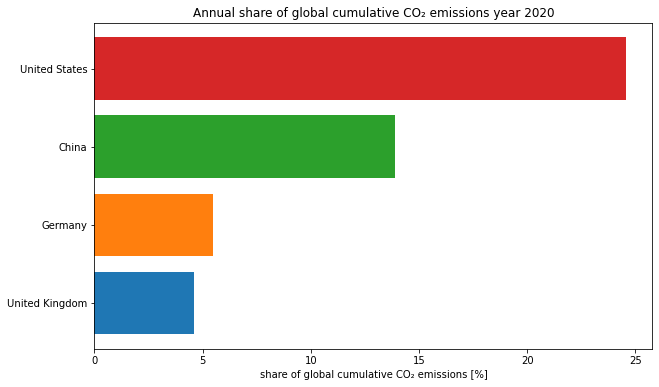

In [46]:
barh_plot(
    data_filtered,
    "share_global_cumulative_co2",
    xlabel="share of global cumulative CO₂ emissions [%]",
    title="Annual share of global cumulative CO₂ emissions",
    ascending=True,
)